# **Connect Drive**

In [14]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df=pd.read_csv('/content/drive/MyDrive/Data Set for Final Project/Data Set 01 Android Malware (CIC MalDroid 2020).csv')

# **Data Processing**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11598 entries, 0 to 11597
Columns: 471 entries, ACCESS_PERSONAL_INFO___ to Class
dtypes: int64(471)
memory usage: 41.7 MB


In [17]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nColumns with infinite values:")
print((df == float('inf')).sum())


Missing values per column:
ACCESS_PERSONAL_INFO___    0
ALTER_PHONE_STATE___       0
ANTI_DEBUG_____            0
CREATE_FOLDER_____         0
CREATE_PROCESS`_____       0
                          ..
watchRotation              0
windowGainedFocus          0
write                      0
writev                     0
Class                      0
Length: 471, dtype: int64

Columns with infinite values:
ACCESS_PERSONAL_INFO___    0
ALTER_PHONE_STATE___       0
ANTI_DEBUG_____            0
CREATE_FOLDER_____         0
CREATE_PROCESS`_____       0
                          ..
watchRotation              0
windowGainedFocus          0
write                      0
writev                     0
Class                      0
Length: 471, dtype: int64


In [18]:
#Split features and terget
X = df.drop('Class', axis=1)
y = df['Class']

In [19]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
df.head()

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# **Linner Discriminant Analysis**

In [22]:
#02.Linner Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

#Make predictions
y_pred = lda.predict(X_test)

In [23]:
#Evaluation with Full Metrics Linner Discriminant Analysis
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        lda.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.7513
Precision: 0.7604
Recall: 0.7513
F1 Score: 0.7466
ROC AUC Score: 0.9139
Balanced Accuracy: 0.7032
Matthews Corr Coef: 0.6763


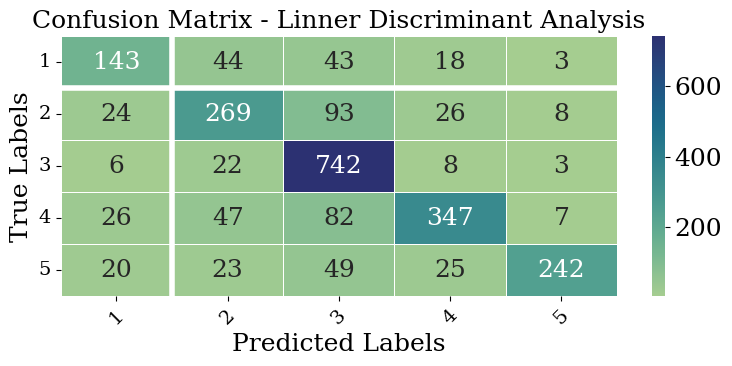

In [24]:
#Confusion Matrix Linner Discriminant Analysis
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Linner Discriminant Analysis"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

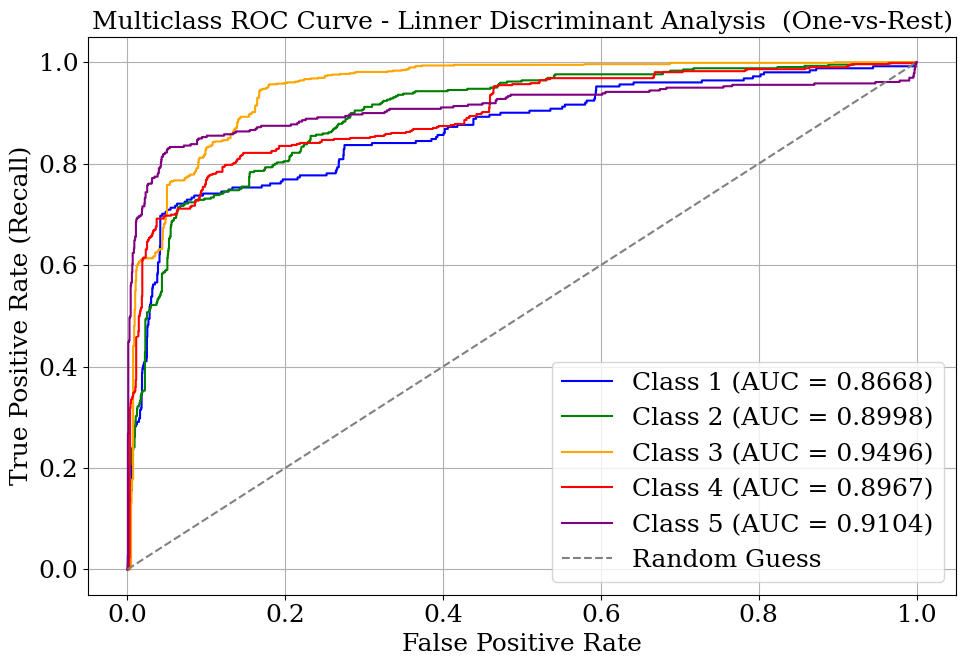

In [25]:
#ROC Curve Linner Discriminant Analysis
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(lda.classes_):
    # Get the column index of the current class
    class_index = list(lda.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = lda.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Linner Discriminant Analysis  (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Decision Tree**

In [26]:
#04.Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [27]:
#Evaluation with Full Metrics Decision tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9086
Precision: 0.9089
Recall: 0.9086
F1 Score: 0.9087
ROC AUC Score: 0.9441
Balanced Accuracy: 0.8907
Matthews Corr Coef: 0.8814


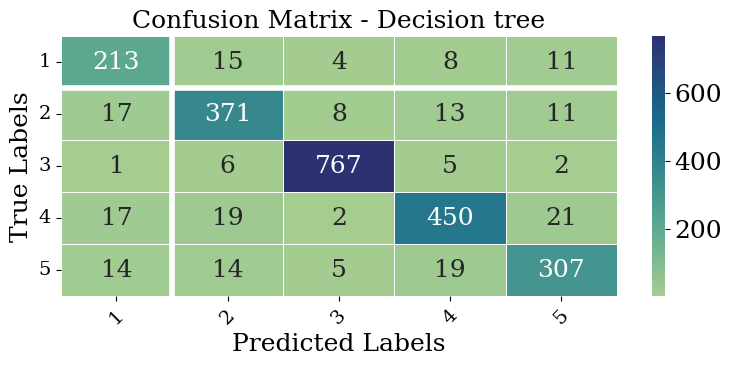

In [28]:
#Confusion Matrix Decision tree
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Decision tree"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

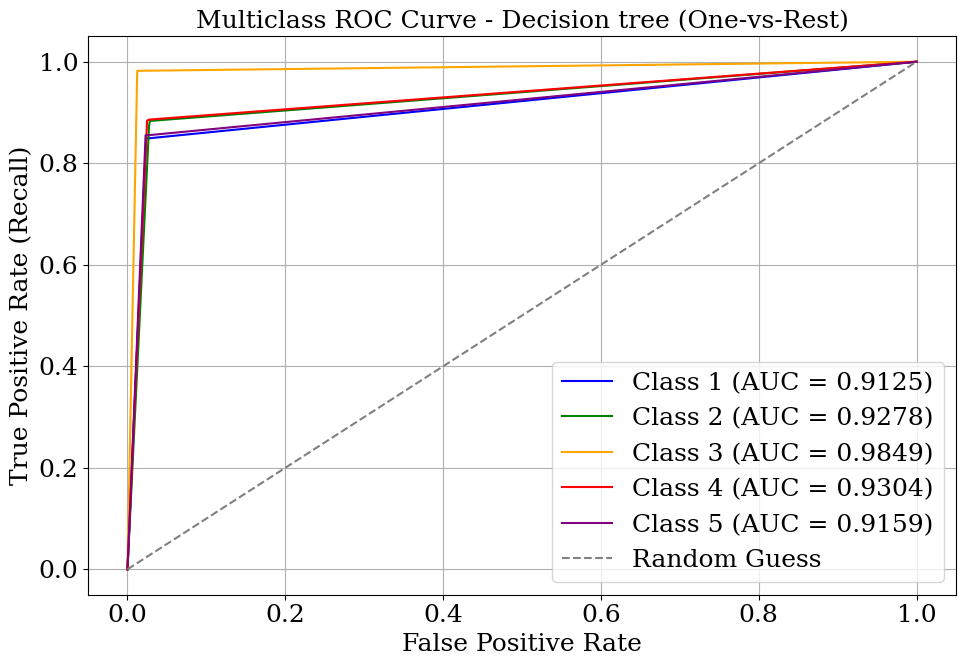

In [29]:
#Roc Curve Decision tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(clf.classes_):
    # Get the column index of the current class
    class_index = list(clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Decision tree (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Random Forest**

In [30]:
#05. Random Froest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

In [31]:
#Evaluation with Full Metrics Random Froest
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        rf_clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9466
Precision: 0.9478
Recall: 0.9466
F1 Score: 0.9466
ROC AUC Score: 0.9958
Balanced Accuracy: 0.9389
Matthews Corr Coef: 0.9309


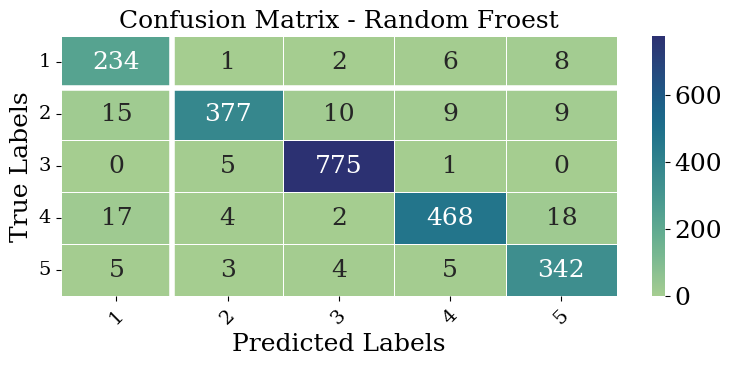

In [32]:
#Confusion Matrix Random Froest
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Random Froest"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

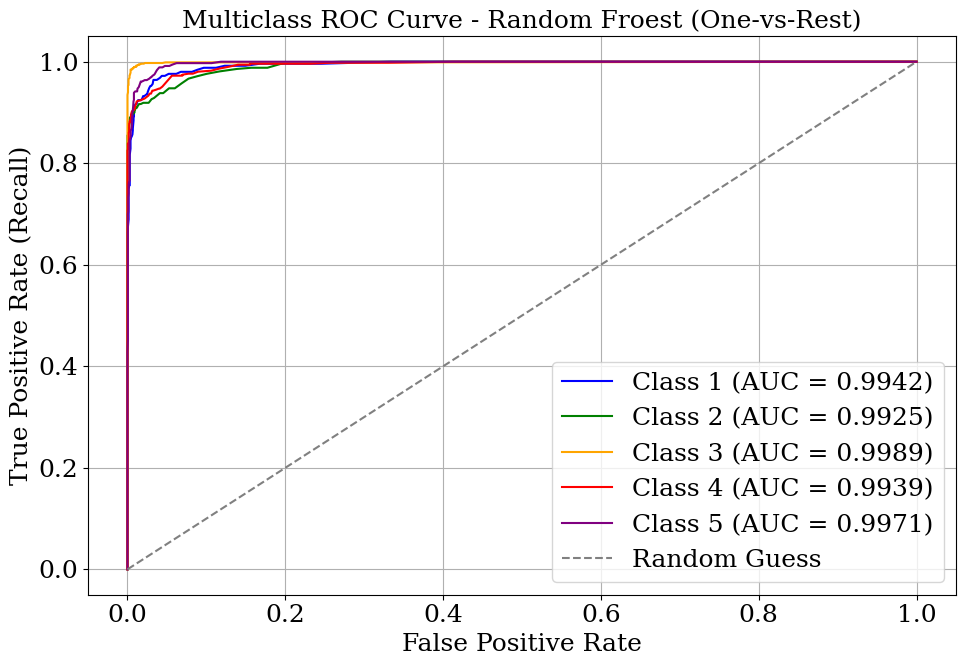

In [33]:
#Roc Curve Random Froest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(rf_clf.classes_):
    # Get the column index of the current class
    class_index = list(rf_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = rf_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Random Froest (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Gradient Boosting**

In [34]:
#06.Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Step 5: Predict
y_pred = gb_clf.predict(X_test)

In [35]:
#Evaluation with Full Metrics Random Froest
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        rf_clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9323
Precision: 0.9327
Recall: 0.9323
F1 Score: 0.9322
ROC AUC Score: 0.9958
Balanced Accuracy: 0.9209
Matthews Corr Coef: 0.9122


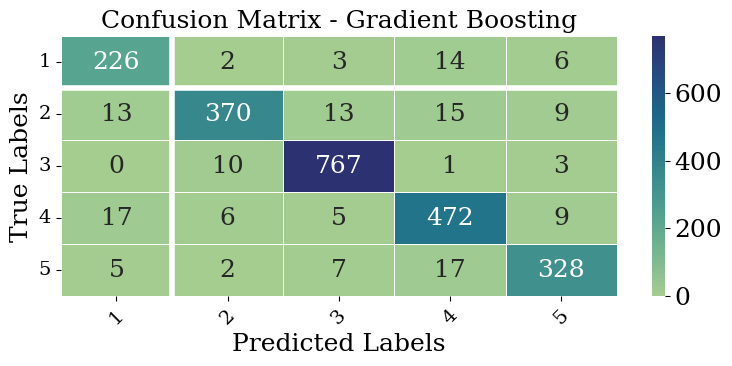

In [36]:
#Confusion Matrix Gradient Boosting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Gradient Boosting"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

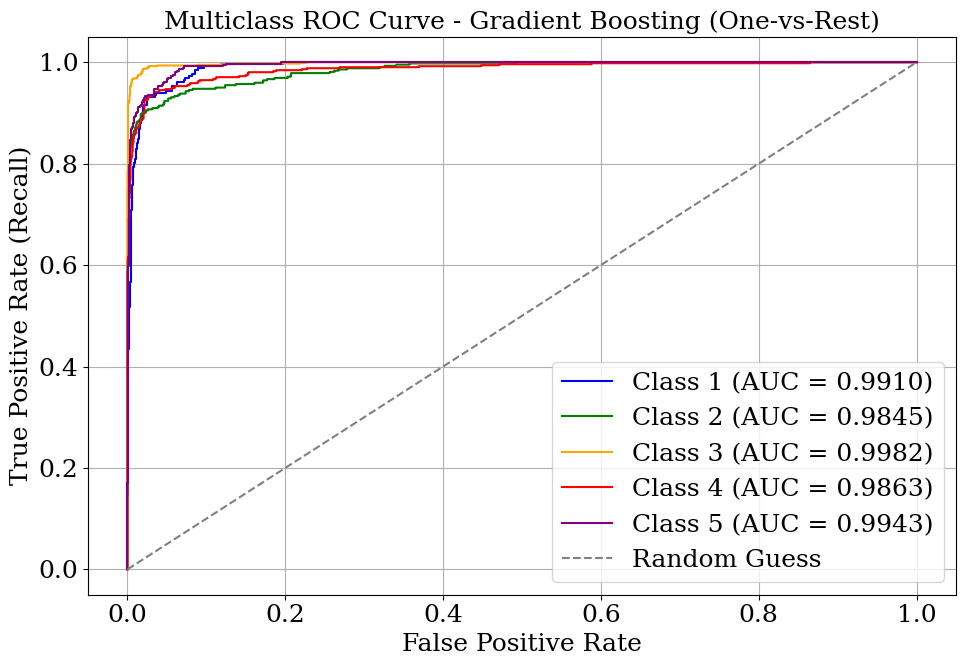

In [37]:
#Roc Curve Gradient Boosting
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(gb_clf.classes_):
    # Get the column index of the current class
    class_index = list(gb_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = gb_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Gradient Boosting (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **X-Gradient Boosting**

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [39]:
#07.X-Gradient Boosting
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict
y_pred = xgb_clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:30:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
#Evaluation with Full Metrics X-Gradient Boosting
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        xgb_clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9530
Precision: 0.9532
Recall: 0.9530
F1 Score: 0.9529
ROC AUC Score: 0.9965
Balanced Accuracy: 0.9453
Matthews Corr Coef: 0.9391


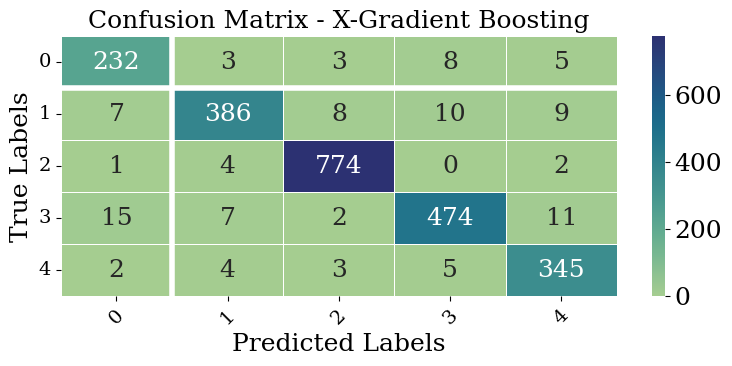

In [41]:
#Confusion Matrix X-Gradient Boosting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - X-Gradient Boosting"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = np.unique(y_test) # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

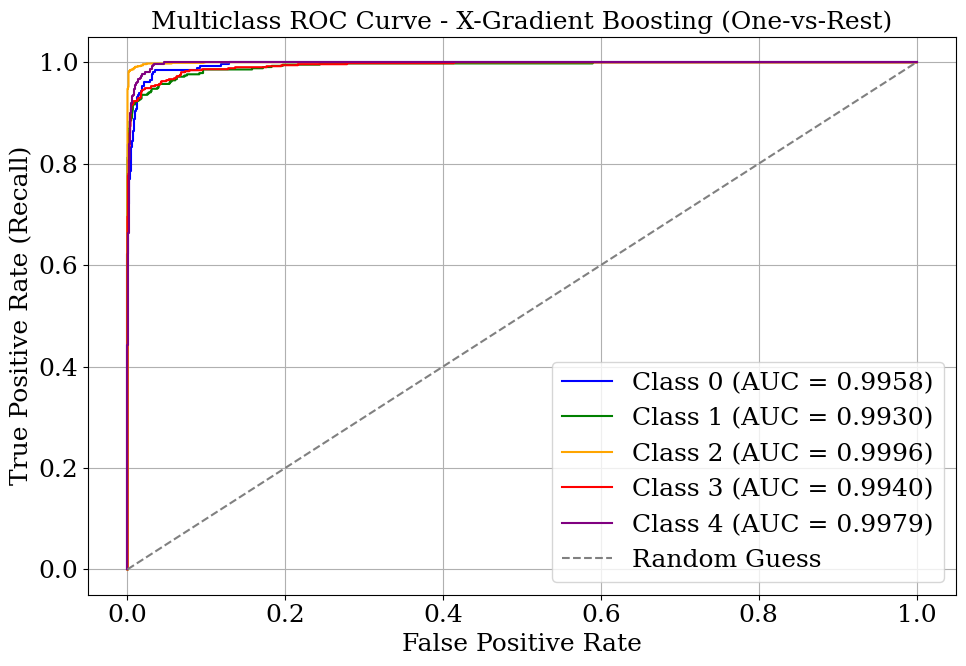

In [42]:
#Roc Curve X-Gradient Boosting
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(xgb_clf.classes_):
    # Get the column index of the current class
    class_index = list(xgb_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = xgb_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - X-Gradient Boosting (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Light GBM**

In [43]:
print("Train labels:", np.unique(y_train))
print("Test labels:", np.unique(y_test))

Train labels: [0 1 2 3 4]
Test labels: [0 1 2 3 4]


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [45]:
print("Encoded labels:", np.unique(y_train_enc))

Encoded labels: [0 1 2 3 4]


In [46]:
#08.Light GBM
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train_enc)
test_data = lgb.Dataset(X_test, label=y_test_enc, reference=train_data)
# Parameters
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_enc)),
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

# Train model
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    valid_names=['validation'],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Predict probabilities
y_pred_prob = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Get predicted class indices
y_pred_enc = [np.argmax(x) for x in y_pred_prob]

# Decode back to original labels if needed
y_pred = le.inverse_transform(y_pred_enc)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[69]	validation's multi_logloss: 0.152499


In [47]:
#Evaluation with Full Metrics Light GBM
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_test_encoded = le.transform(y_test)
roc_auc = roc_auc_score(
    y_test_encoded,
    y_pred_prob,
    multi_class='ovr',
    average='weighted'
)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9509
Precision: 0.9513
Recall: 0.9509
F1 Score: 0.9508
ROC AUC Score: 0.9965
Balanced Accuracy: 0.9432
Matthews Corr Coef: 0.9363


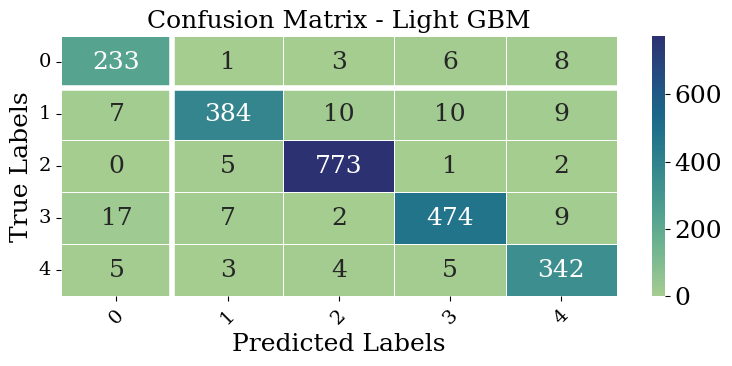

In [48]:
#Confusion Matrix Light GBM
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Light GBM"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

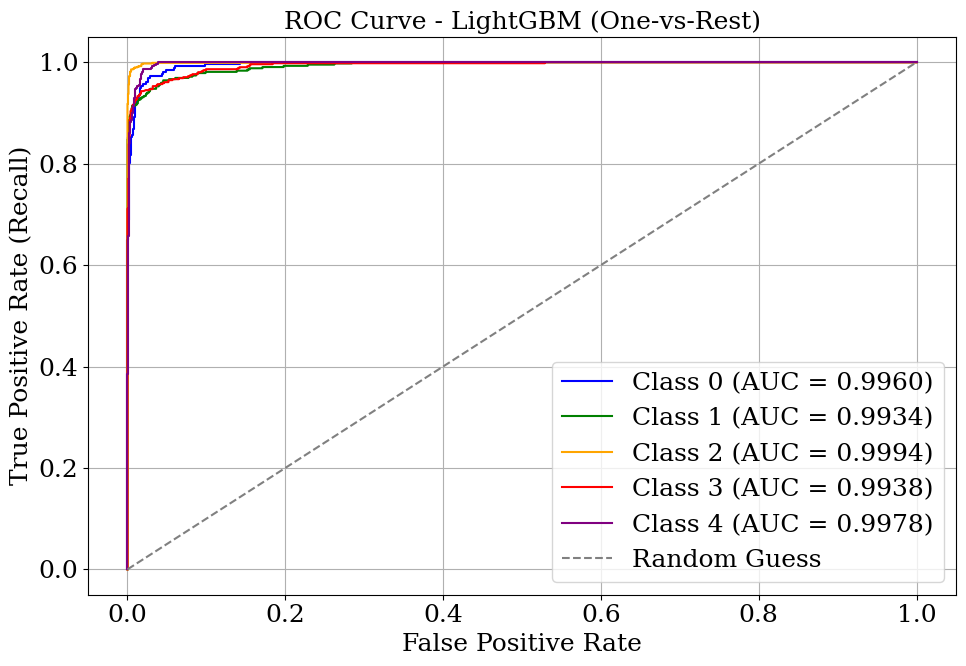

In [49]:
#Roc Curve Light GBM
# ROC Curve Light GBM (works for both binary & multi-class)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Unique class labels
class_labels = np.unique(y_test)

# Predicted probabilities
y_pred_prob = gbm.predict(X_test, num_iteration=gbm.best_iteration)

for idx, positive_class in enumerate(class_labels):
    # Binary classification case: y_pred_prob is 1D
    if y_pred_prob.ndim == 1:
        if idx == 0:
            y_prob_val = 1 - y_pred_prob  # Probability of class 0
        else:
            y_prob_val = y_pred_prob      # Probability of class 1
    else:
        # Multi-class case
        y_prob_val = y_pred_prob[:, idx]

    # Create binary labels for the current class
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx % len(colors)])

# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Labels and settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - LightGBM (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Cat Boosting**

In [50]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [51]:
#09.Cat Boosting
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [52]:
#Evaluation with Full Metrics Cat Boosting
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        model.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9470
Precision: 0.9475
Recall: 0.9470
F1 Score: 0.9470
ROC AUC Score: 0.9948
Balanced Accuracy: 0.9398
Matthews Corr Coef: 0.9313


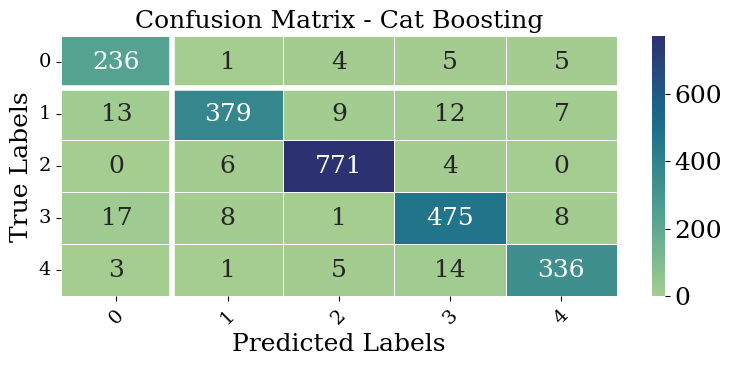

In [53]:
#Confusion Matrix Cat Boosting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Cat Boosting"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels

class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

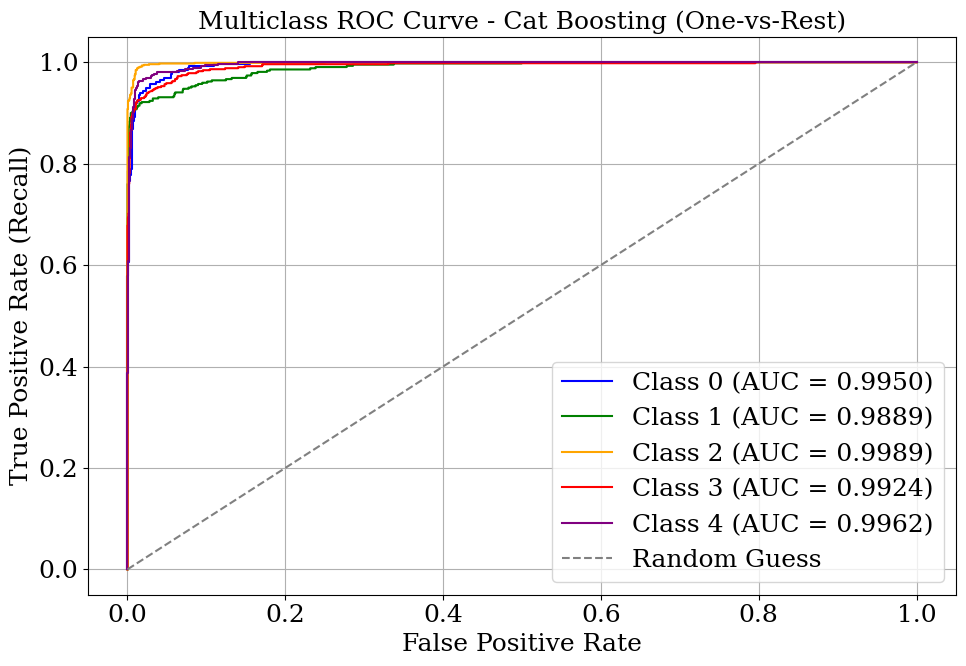

In [54]:
#Roc Curve Cat Boosting
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(model.classes_):
    # Get the column index of the current class
    class_index = list(model.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = model.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Cat Boosting (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Extra tree Classification**

In [55]:
#10.Extra tree Classification
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

#Train the model
extra_clf.fit(X_train, y_train)

#Predict
y_pred = extra_clf.predict(X_test)

In [56]:
#Evaluation with Full Metrics Extra tree Classification
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        extra_clf.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9422
Precision: 0.9435
Recall: 0.9422
F1 Score: 0.9423
ROC AUC Score: 0.9951
Balanced Accuracy: 0.9339
Matthews Corr Coef: 0.9253


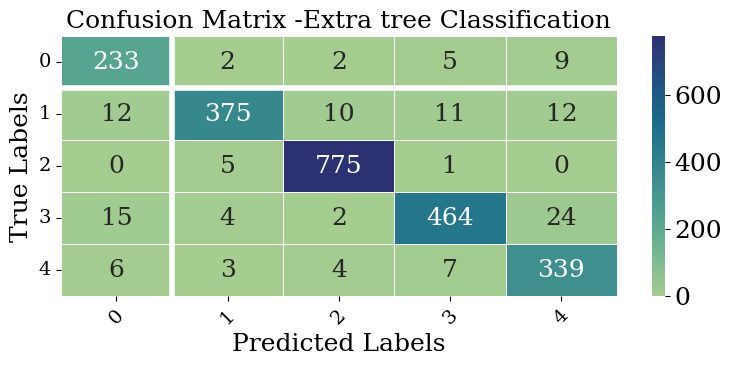

In [57]:
#Confusion Matrix Extra tree Classification
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -Extra tree Classification"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

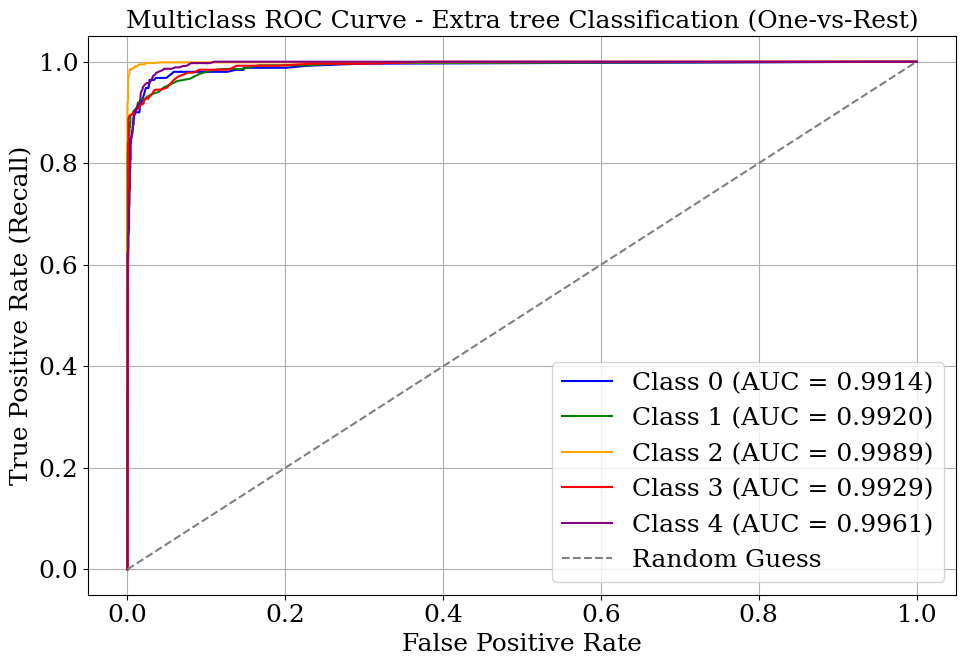

In [58]:
#Roc Curve Extra tree Classification
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(extra_clf.classes_):
    # Get the column index of the current class
    class_index = list(extra_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = extra_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Extra tree Classification (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Support Vectore Machine**

In [59]:
#11.Support Vectore Machine
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

#Predict
y_pred = svm_clf.predict(X_test)

In [60]:
#Evaluation with Full Metrics Support Vectore Machine
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, svm_clf.predict_proba(X_test), multi_class='ovr', average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.4659
Precision: 0.5758
Recall: 0.4659
F1 Score: 0.3866
ROC AUC Score: 0.7779
Balanced Accuracy: 0.3459
Matthews Corr Coef: 0.2945


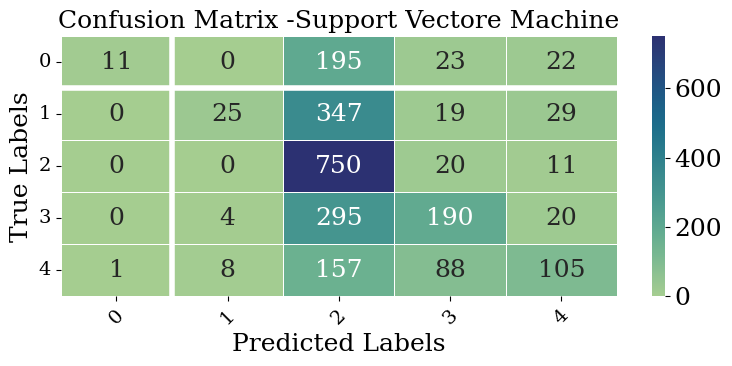

In [61]:
#Confusion Matrix Support Vectore Machine
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -Support Vectore Machine"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

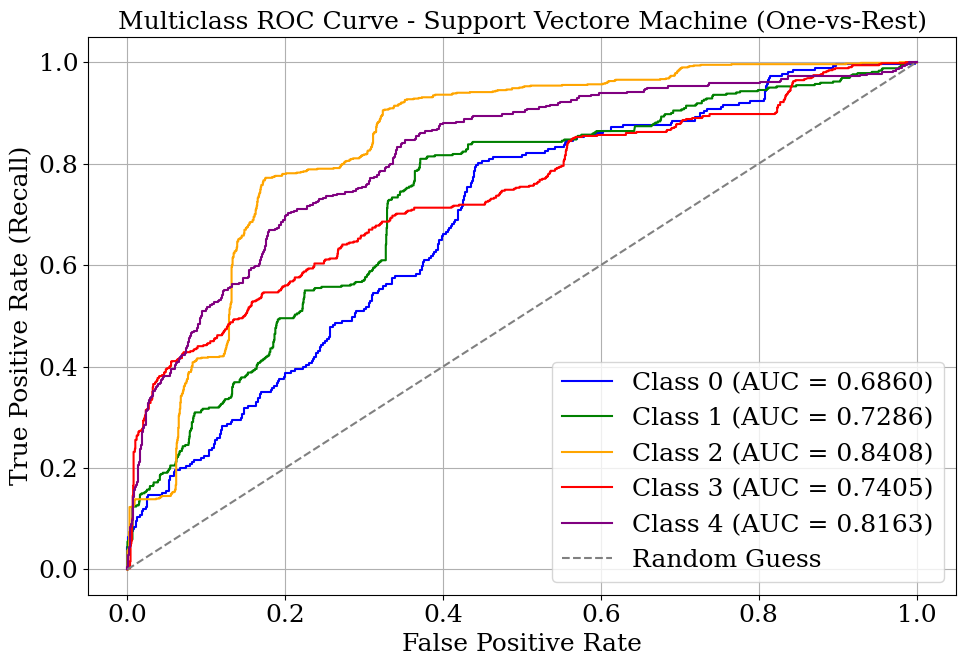

In [62]:
#Roc Curve Support Vectore Machine
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(svm_clf.classes_):
    # Get the column index of the current class
    class_index = list(svm_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = svm_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Support Vectore Machine (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **KNN**

In [63]:
#16.Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 4: Predict
y_pred = knn.predict(X_test)

In [64]:
#Evaluation with Full Metrics KNN
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test,
                        knn.predict_proba(X_test),
                        multi_class='ovr',
                        average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.8547
Precision: 0.8555
Recall: 0.8547
F1 Score: 0.8538
ROC AUC Score: 0.9476
Balanced Accuracy: 0.8220
Matthews Corr Coef: 0.8116


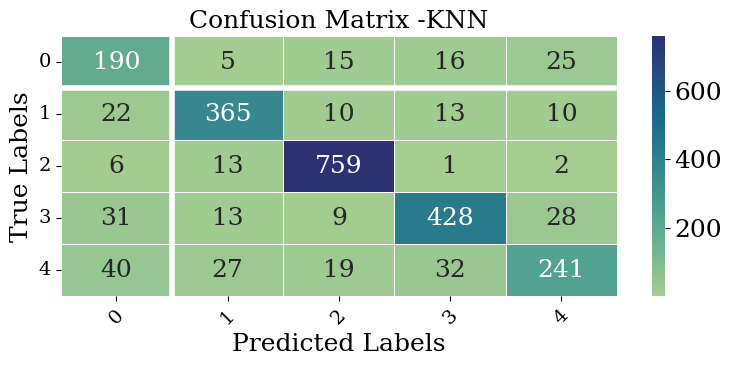

In [65]:
#Confusion Matrix KNN
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -KNN"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

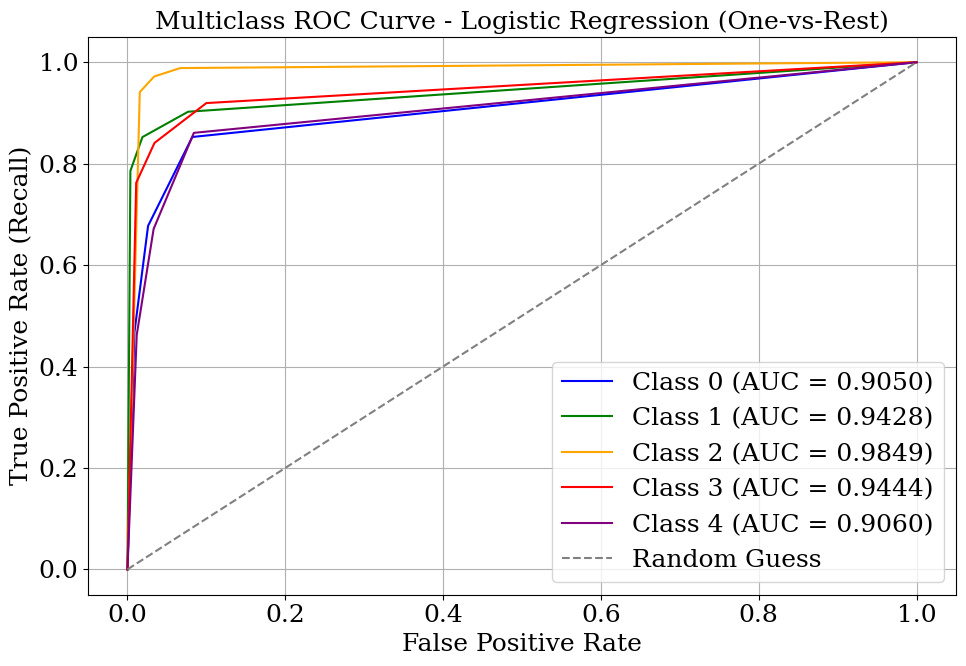

In [66]:
#Roc Curve Logistic Regression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'orange', 'red', 'purple']  # One color per class

for idx, positive_class in enumerate(knn.classes_):
    # Get the column index of the current class
    class_index = list(knn.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = knn.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Logistic Regression (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()